In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import rec_gym
from rec_gym.wrappers import StatsWrapper, FlattenObservationsWrapper
from copy import deepcopy
from rec_gym.runner import run_experiment

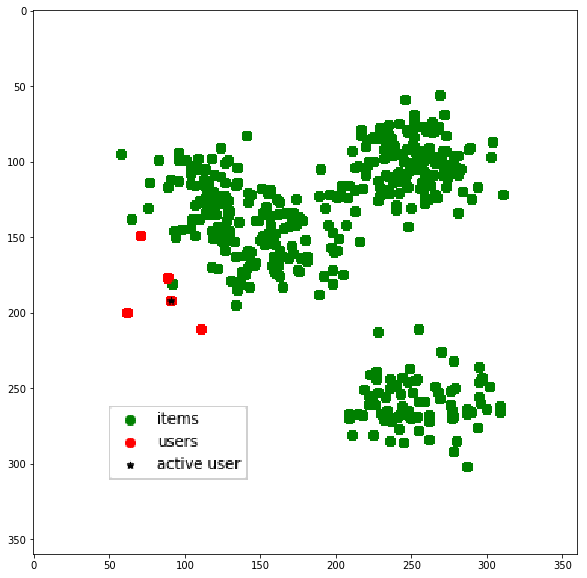

In [3]:
import gym
import rec_gym
from rec_gym.wrappers import StatsWrapper, FlattenObservationsWrapper
from rec_gym.envs import GeneratedRecEnv

env = StatsWrapper(GeneratedRecEnv(
    n_items = 400,
    n_users = 5,
    n_rec = 4,
    embedding_dimension = 2,
    user_change_prob = 0.05,
    reward_noise = 0.05,
    user_initial_n_clusters = 4,
    user_init_sigma  = 2,
    user_cluster_sigma = 4,
    user_ar_coef = 0.9,
    user_drift_sigma = 0.3,
    initial_n_clusters = 5,
    cluster_var = 4,
    in_cluster_var = 1,
    new_items_interval = 100,
    new_items_size = 0.2,
    click_prob_type = 'normal',
    user_preference_type = 'static'
))

import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(env.render(mode='rgb_array'))

In [4]:
obs = env.reset()

WARN: <class 'rec_gym.wrappers.stats_wrapper.StatsWrapper'> doesn't implement 'reset' method, which is required for wrappers derived directly from Wrapper. Deprecated default implementation is used.


In [5]:
env.action_space

NDiscreteTuple(Discrete(400), Discrete(400), Discrete(400), Discrete(400))

In [7]:
a = env.action_space.sample()

In [8]:
obs, reward, done, info = env.step(a)

In [9]:
info

{'rewards': [0, 0, 0, 0],
 'recs': [70, 43, 52, 68],
 'probs': [0.0, 0.0, 0.003521918207098402, 0.009632973490254167],
 'best_ps': [0.024736618144550387,
  0.024495944963471093,
  0.024194837019405876,
  0.024081376515358174],
 'ranks': [38, 30, 45, 5]}

In [10]:
env.interactions

[Interaction(t=1, uid=4, recs=[70, 43, 52, 68], rewards=[0, 0, 0, 0], probs=[0.0, 0.0, 0.003521918207098402, 0.009632973490254167], best_ps=[0.024736618144550387, 0.024495944963471093, 0.024194837019405876, 0.024081376515358174], ranks=[38, 30, 45, 5])]